In [2]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=2b34a186548af96b1f0562a830d0fc74519abc7b175290a44c0d7d0489dcf1c0
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [4]:
# Giriş ve çıkış değişkenleri oluşturma
borc = ctrl.Antecedent(np.arange(0, 5001, 1), 'Borc')
gelir = ctrl.Antecedent(np.arange(0, 20001, 1), 'Gelir')
risk = ctrl.Consequent(np.arange(0, 11, 1), 'Risk')

In [5]:
# Üyelik fonksiyonlarını tanımlama
borc['Dusuk'] = fuzz.trimf(borc.universe, [0, 0, 2500])
borc['Orta'] = fuzz.trimf(borc.universe, [1500, 2500, 3500])
borc['Yuksek'] = fuzz.trimf(borc.universe, [2500, 5000, 5000])

gelir['Dusuk'] = fuzz.trimf(gelir.universe, [0, 0, 10000])
gelir['Orta'] = fuzz.trimf(gelir.universe, [5000, 10000, 15000])
gelir['Yuksek'] = fuzz.trimf(gelir.universe, [10000, 20000, 20000])

risk['Dusuk'] = fuzz.trimf(risk.universe, [0, 0, 5])
risk['Orta'] = fuzz.trimf(risk.universe, [3, 5, 7])
risk['Yuksek'] = fuzz.trimf(risk.universe, [5, 10, 10])

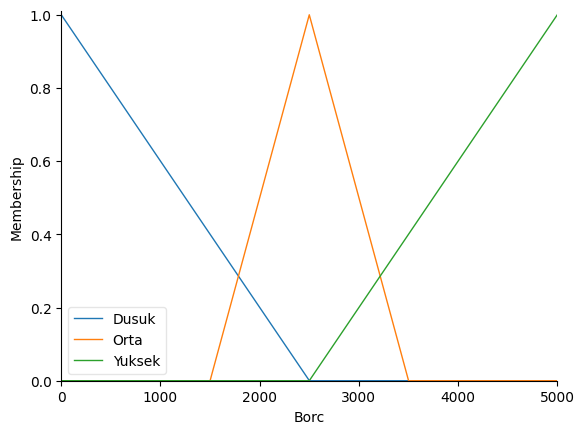

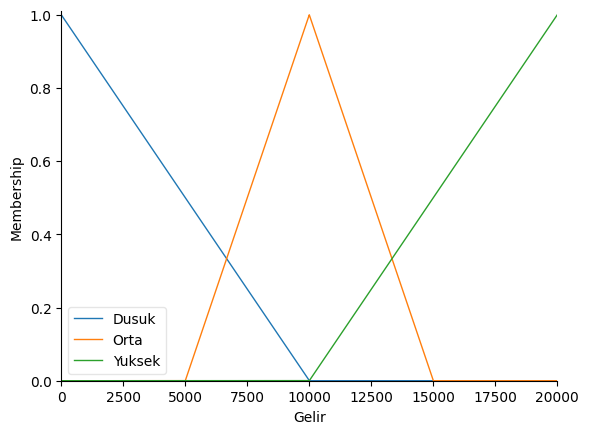

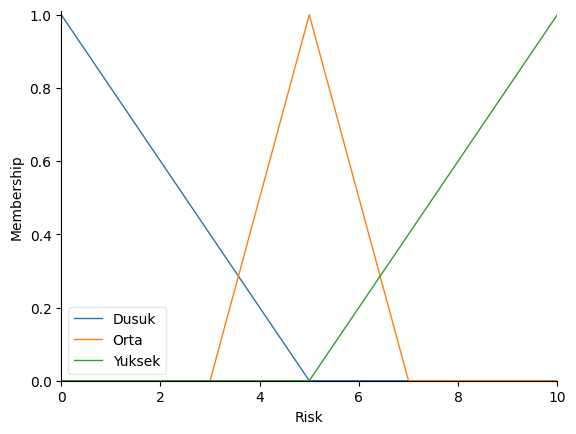

In [6]:
borc.view()
gelir.view()
risk.view()

In [7]:
# Kuralları tanımlama
rule1 = ctrl.Rule(borc['Dusuk'] & gelir['Dusuk'], risk['Orta'])
rule2 = ctrl.Rule(borc['Dusuk'] & gelir['Orta'], risk['Dusuk'])
rule3 = ctrl.Rule(borc['Dusuk'] & gelir['Yuksek'], risk['Dusuk'])

rule4 = ctrl.Rule(borc['Orta'] & gelir['Dusuk'], risk['Orta'])
rule5 = ctrl.Rule(borc['Orta'] & gelir['Orta'], risk['Orta'])
rule6 = ctrl.Rule(borc['Orta'] & gelir['Yuksek'], risk['Dusuk'])

rule7 = ctrl.Rule(borc['Yuksek'] & gelir['Dusuk'], risk['Yuksek'])
rule8 = ctrl.Rule(borc['Yuksek'] & gelir['Orta'], risk['Yuksek'])
rule9 = ctrl.Rule(borc['Yuksek'] & gelir['Yuksek'], risk['Orta'])

In [9]:
# Kontrol sistemi oluşturma
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9])
risk_simulation = ctrl.ControlSystemSimulation(risk_ctrl)

In [16]:
# Girişlere değer atama
risk_simulation.input['Borc'] = 1000
risk_simulation.input['Gelir'] =15000

Risk Değeri: 1.9444444444444444


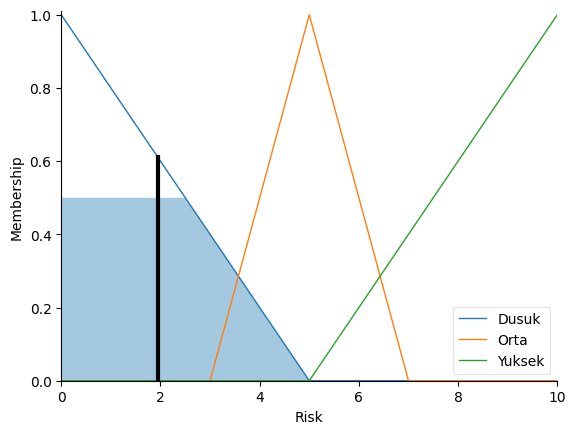

In [17]:
# Hesaplama
risk_simulation.compute()
# Sonuçları gösterme
print("Risk Değeri:", risk_simulation.output['Risk'])
risk.view(sim=risk_simulation)

In [12]:
# Girişlere değer atama
risk_simulation.input['Borc'] = 2500
risk_simulation.input['Gelir'] = 10000

Risk Değeri: 5.000000000000001


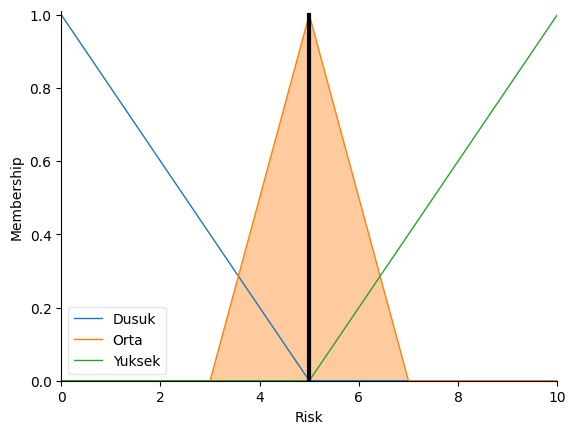

In [13]:
# Hesaplama
risk_simulation.compute()
# Sonuçları gösterme
print("Risk Değeri:", risk_simulation.output['Risk'])
risk.view(sim=risk_simulation)

In [18]:
# Girişlere değer atama
risk_simulation.input['Borc'] = 4600
risk_simulation.input['Gelir'] = 2000

Risk Değeri: 8.277777777777777


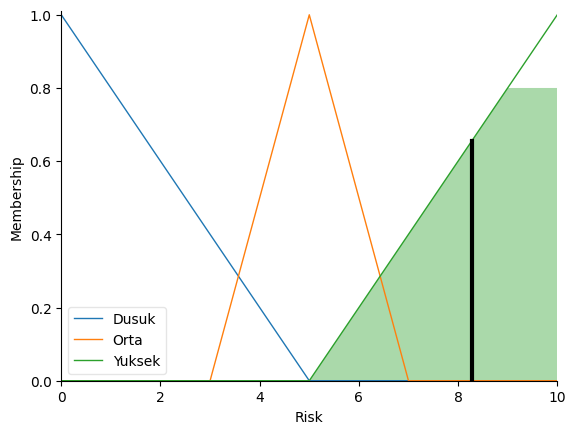

In [19]:
# Hesaplama
risk_simulation.compute()
# Sonuçları gösterme
print("Risk Değeri:", risk_simulation.output['Risk'])
risk.view(sim=risk_simulation)